In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Dogs')

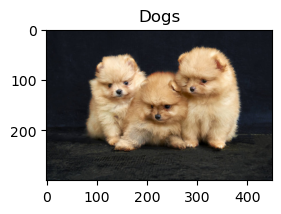

In [4]:
img = plt.imread('C:/Users/WXJ/OneDrive/Desktop/机器学习下代码/k-means/dog4.jpg')
row = img.shape[0]
col =img.shape[1]
plt.subplot(121)
plt.imshow(img)
plt.title('Dogs')

In [5]:
#K-means算法函数
def Kmeans(data,k,iters):
    data = data.reshape(-1, 3)
    data = np.column_stack((data, np.ones(row * col)))#加一行储存标签

    cluster_center = data[np.random.choice(row * col, k)]#随机产生k个中心点

    distance = [[] for i in range(k)]

    for i in range(iters):

        for j in range(k):
            distance[j] = np.sqrt(np.sum((data - cluster_center[j]) ** 2, axis=1))

        data[:, 3] = np.argmin(distance, axis=0)

        for j in range(k):
            cluster_center[j] = np.mean(data[data[:, 3] == j], axis=0)
    return data[:, 3]

In [6]:
#FCM函数算法
def FCM(X, c, m, eps, max_its):
    num = X.shape[0] * X.shape[1]  # 计算像素总数
    X = X.reshape(num, X.shape[2])  # 将图像数据重塑为二维数组形式
    u = np.random.random((num, c))  # 初始化隶属度矩阵
    u = np.divide(u, np.sum(u, axis=1)[:, np.newaxis])  # 归一化隶属度矩阵

    it = 0
    while it < max_its:
        it += 1

        um = u ** m  # 加权隶属度
        center = np.dot(um.T, X) / np.sum(um.T, axis=1)[:, np.newaxis]  # 计算聚类中心

        # 计算所有点到所有中心的距离
        distance = cdist(X, center, metric='euclidean') ** 2

        new_u = np.zeros((num, c))
        for j in range(c):
            new_u[:, j] = 1. / np.sum((distance[:, j, np.newaxis] / distance) ** (2 / (m - 1)), axis=1)  # 更新隶属度

        if np.sum(np.abs(new_u - u)) < eps:
            break

        u = new_u

    # 返回聚类结果，并reshape回图像的形状
    return np.argmax(u, axis=1).reshape((row, col))

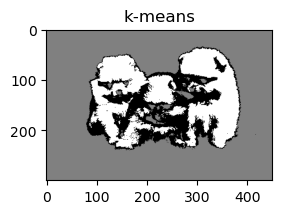

In [8]:
#K-means聚类结果(k=3)：
image_show = Kmeans(img, 3, 100)
image_show = image_show.reshape(row, col)
plt.subplot(122)
plt.imshow(image_show,cmap='gray')
plt.title('k-means')
plt.show()

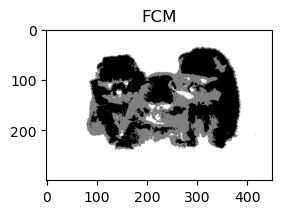

In [9]:
#FCM聚类结果（c=3,m=2）
image_show = FCM(img, 3, 2, 1, 100)
plt.subplot(122)
plt.imshow(image_show, cmap='gray')
plt.title('FCM')
plt.show()